# Détection des faux Billets

Ce projet a pour but de créer un algorithme de détection de faux billets et revoir des notions vues aux épisodes précédents.

Le [jeu de données](https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/notes.csv)  contenant les caractéristiques géométriques de billets de banque. Pour chacun d'eux, nous connaissons :

 - la longueur du billet (en mm) ;  
 - la hauteur du billet (mesurée sur le côté gauche, en mm) ;  
 - La hauteur du billet (mesurée sur le côté droit, en mm) ;  
 - la marge entre le bord supérieur du billet et l'image de celui-ci (en mm) ;  
 - la marge entre le bord inférieur du billet et l'image de celui-ci (en mm) ;  
 - la diagonale du billet (en mm).

L'étude va consister en 3 parties : 

Partie 1 : analyse exploratoire univariée et bivariée de votre jeu de données  

Partie 2 : ACP 
    Vous réaliserez une analyse en composantes principales de l'échantillon, en suivant toutes ces étapes :  
        - choix du nombre des composantes
        - représentation des variables par le cercle des corrélations 
        - représentation des individus par les plans factoriels 
        - analyser de la qualité de représentation et la contribution des individus.
Pour chacune de ces étapes, commentez les résultats obtenus. La variable donnant la nature Vrai/Faux du billet sera utilisée comme variable illustrative.

Partie 3 : Réaliser une classification des billets (révisions de kmeans ou régression logique, et aller creuser côté CAH)

In [174]:
# Import des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mp

import sklearn
#classe pour l'ACP
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

#RegLog Kmeans
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

#CAH
from scipy.cluster.hierarchy import dendrogram

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from statsmodels.api import Logit
import statsmodels.api
from scipy import stats

## Partie 1 : ANALYSES BIVARIES

Dans cette partie, vous allez explorer vos données via des visualisations, par exemple :   
    
    - le nombre de billets vrai/faux  
    - les distributions de longueurs, largeurs and co des billets de votre dataset
    - longueur/largeur and co des billets vrais vs. faux : est-ce que visuellement on peut déterminer des caractéristiques des vrais ou des faux billets ?
    - etc -> be creative :)

In [7]:
data = pd.read_csv("D:\\simplon\\ia\\Projet de groupe octobre 2022\\020123\\notes.csv")
data

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


Le nombre de billets vrai/faux

In [19]:
type_billets = data.is_genuine.apply(lambda x: 
                                           "vrai" if x== True 
                                       else "Faux" if x == False
                                    else "NAN")
type_billets= type_billets.value_counts()
type_billets

vrai    100
Faux     70
Name: is_genuine, dtype: int64

([<matplotlib.patches.Wedge at 0x1f55fd79430>,
 [Text(-0.30102937065636565, 1.0580081842794187, 'vrai'),
  Text(0.30102946971423916, -1.0580081560950105, 'faux')],
 [Text(-0.16419783853983577, 0.5770953732433193, '58.8%'),
  Text(0.16419789257140316, -0.5770953578700057, '41.2%')])

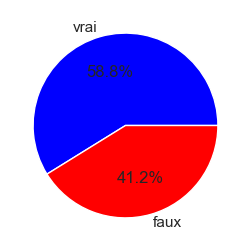

In [122]:
mp.pyplot.pie(x=type_billets,  autopct='%1.1f%%',labels=['vrai','faux'], colors = ['blue', 'red'])

Les distributions de longueurs, largeurs and co des billets de votre dataset

In [ ]:
describe all

<AxesSubplot:xlabel='length'>

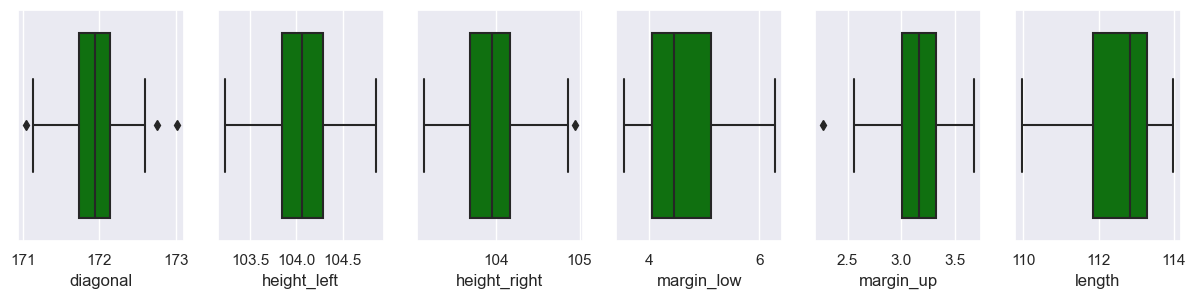

In [140]:
sns.set(rc={"figure.figsize":(15,3)},style='darkgrid')
color = ['red','blue']
fig, ax =plt.subplots(1,6)
sns.boxplot(x=data["diagonal"],color= "green", ax=ax[0])
sns.boxplot(x=data["height_left"],color= "green", ax=ax[1])
sns.boxplot(x=data["height_right"],color= "green", ax=ax[2])
sns.boxplot(x=data["margin_low"],color= "green", ax=ax[3])
sns.boxplot(x=data["margin_up"],color= "green", ax=ax[4])
sns.boxplot(x=data["length"],color= "green",ax=ax[5])

<AxesSubplot:xlabel='is_genuine', ylabel='length'>

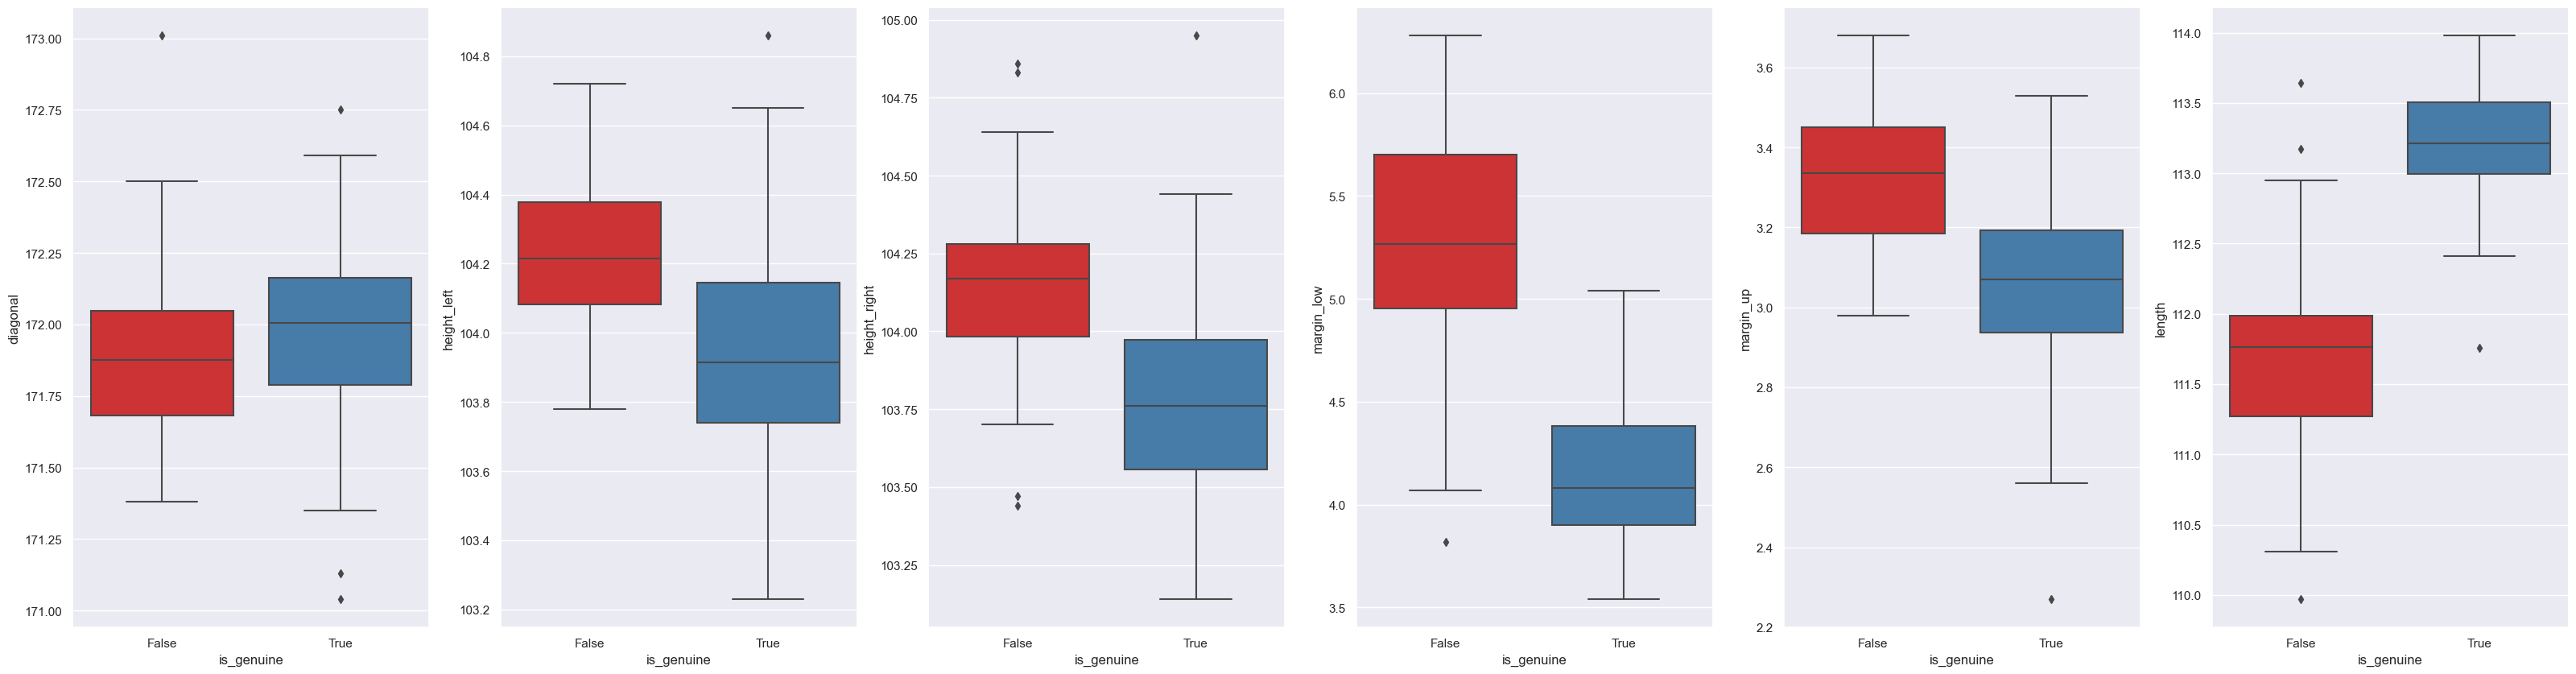

In [149]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
color = ['red','blue']
fig, ax =plt.subplots(1,6)
sns.boxplot(y=data["diagonal"],x=data["is_genuine"],palette = "Set1", ax=ax[0])
sns.boxplot(y=data["height_left"],x=data["is_genuine"],palette = "Set1", ax=ax[1])
sns.boxplot(y=data["height_right"],x=data["is_genuine"],palette = "Set1", ax=ax[2])
sns.boxplot(y=data["margin_low"],x=data["is_genuine"],palette = "Set1", ax=ax[3])
sns.boxplot(y=data["margin_up"],x=data["is_genuine"],palette = "Set1", ax=ax[4])
sns.boxplot(y=data["length"],x=data["is_genuine"],palette = "Set1",ax=ax[5])

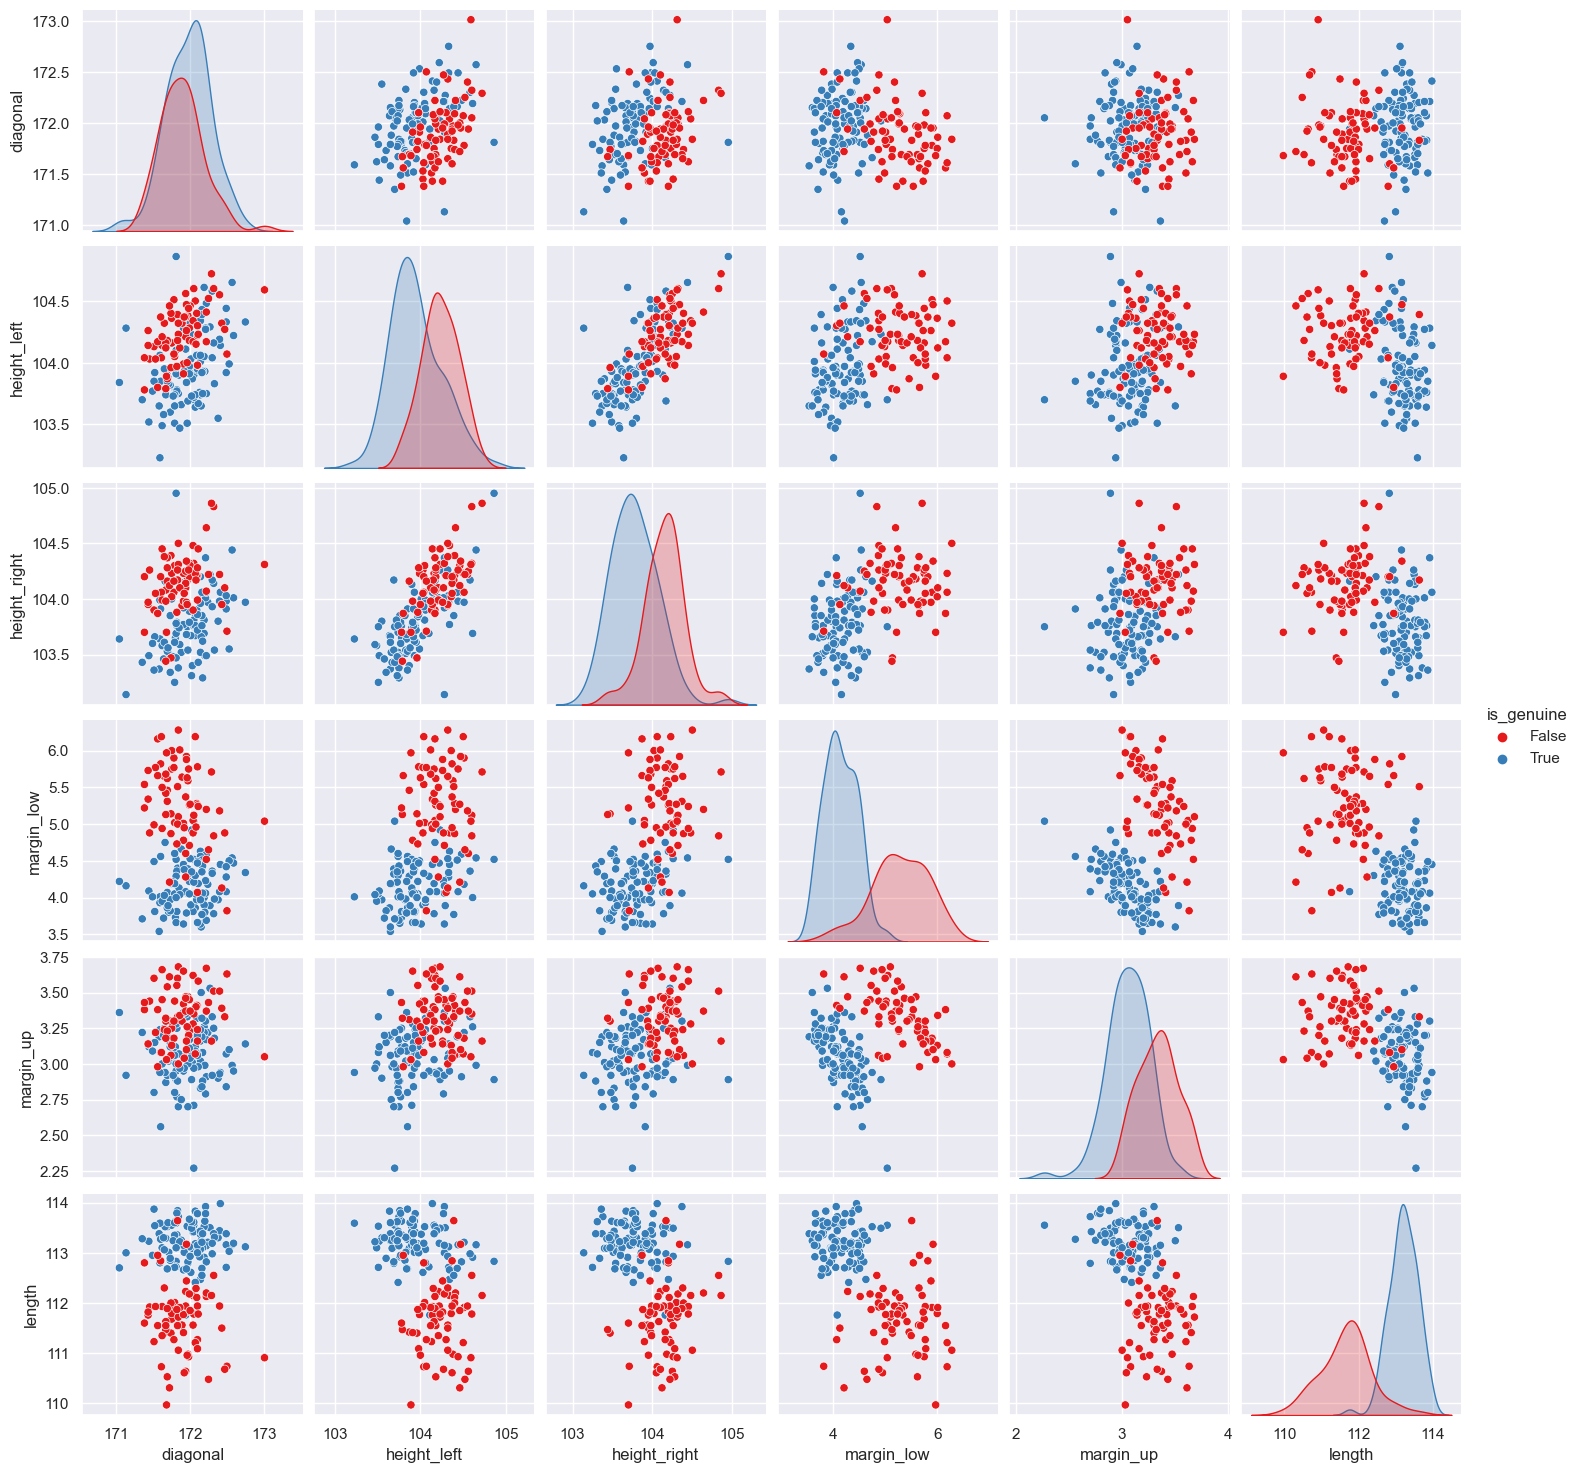

In [135]:
sns.pairplot(data, hue="is_genuine", palette="Set1")

longueur/largeur and co des billets vrais vs. faux :
est-ce que visuellement on peut déterminer des caractéristiques des vrais ou des faux billets ?

<AxesSubplot:xlabel='margin_up', ylabel='Count'>

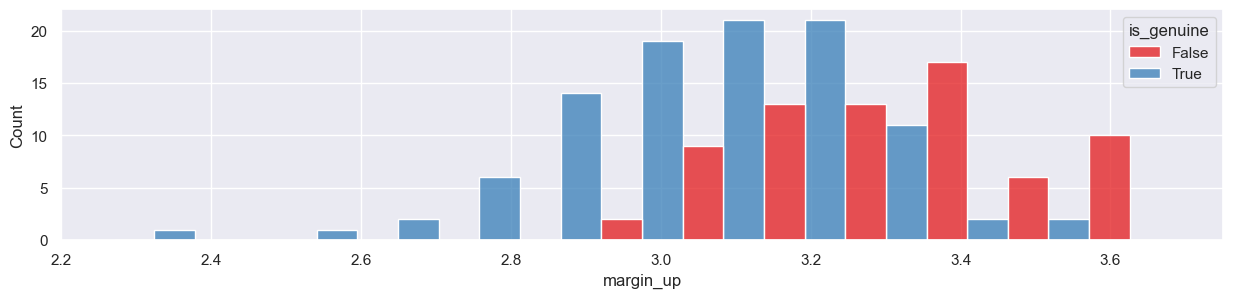

In [117]:
sns.histplot(data=data, x="margin_up", hue="is_genuine", multiple ="dodge", palette = "Set1")

<AxesSubplot:xlabel='margin_low', ylabel='Count'>

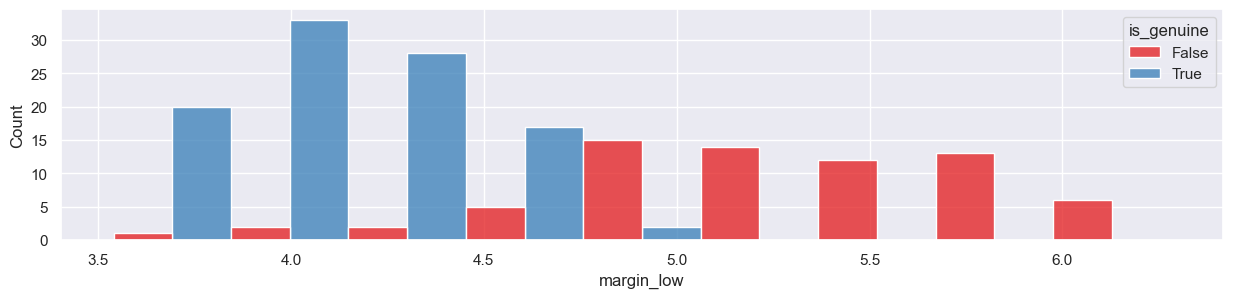

In [118]:
sns.histplot(data=data, x="margin_low", hue="is_genuine", multiple ="dodge",palette = "Set1")

<AxesSubplot:xlabel='length', ylabel='Count'>

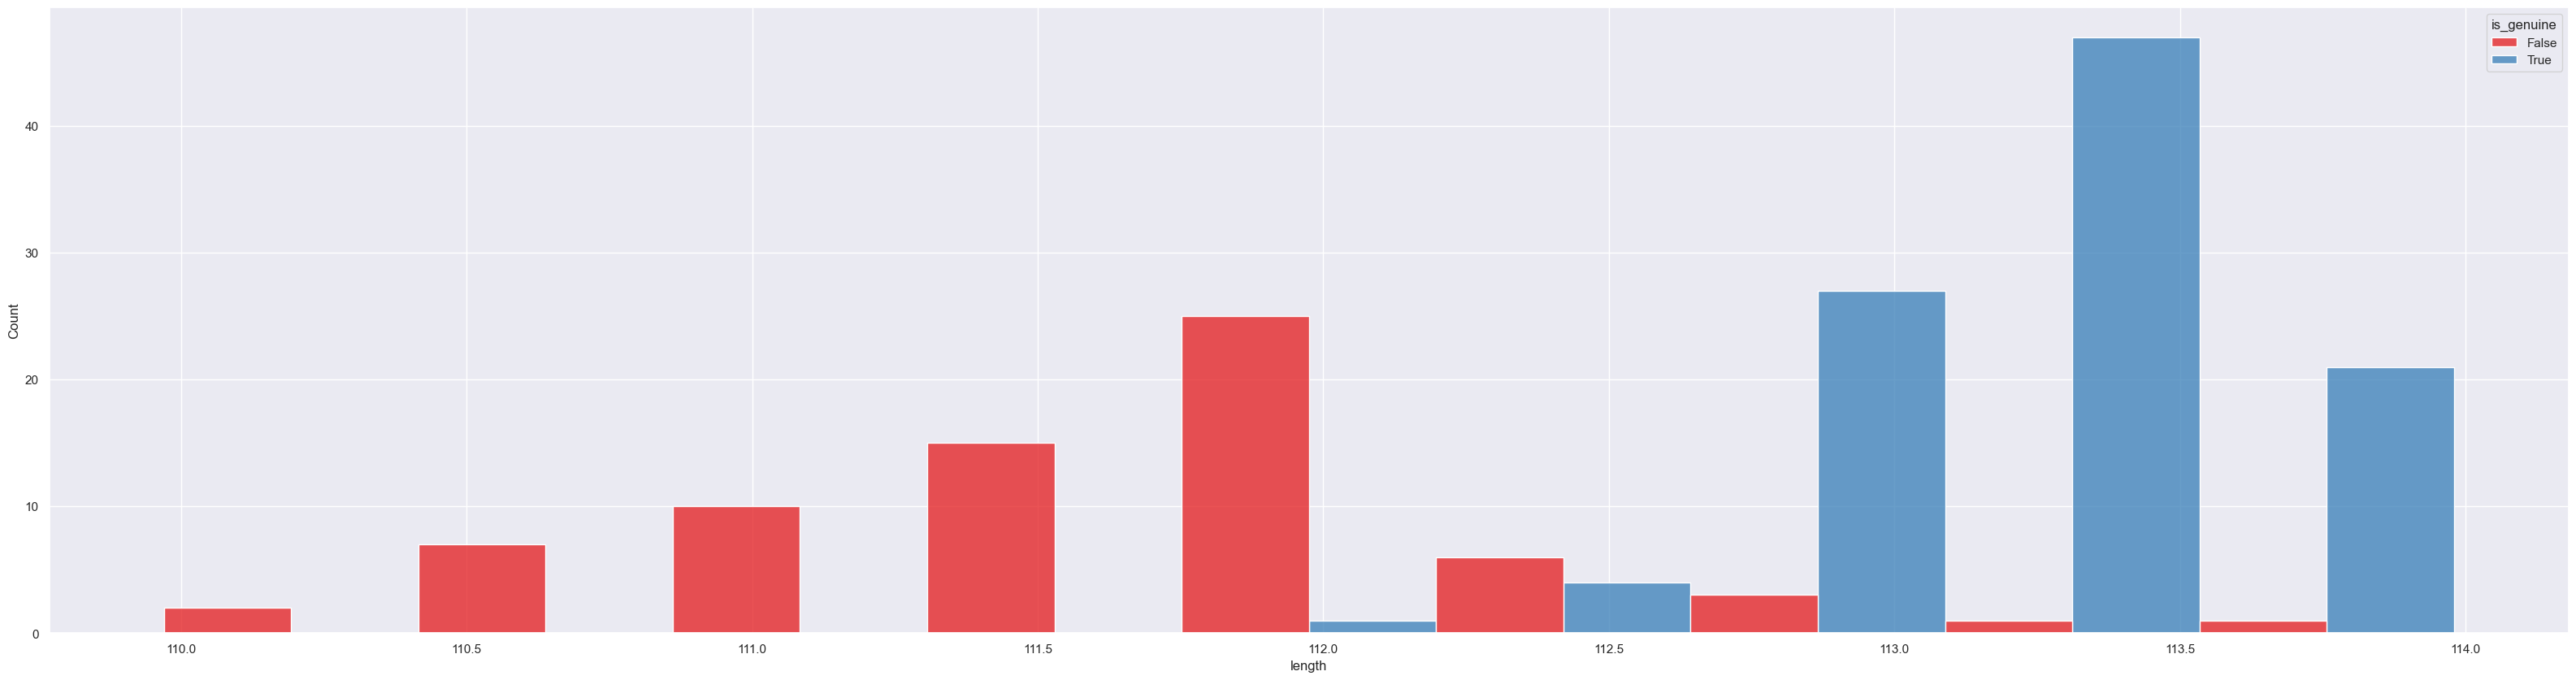

In [150]:
sns.histplot(data=data, x="length", hue="is_genuine", multiple ="dodge",palette = "Set1")

<AxesSubplot:xlabel='height_left', ylabel='Count'>

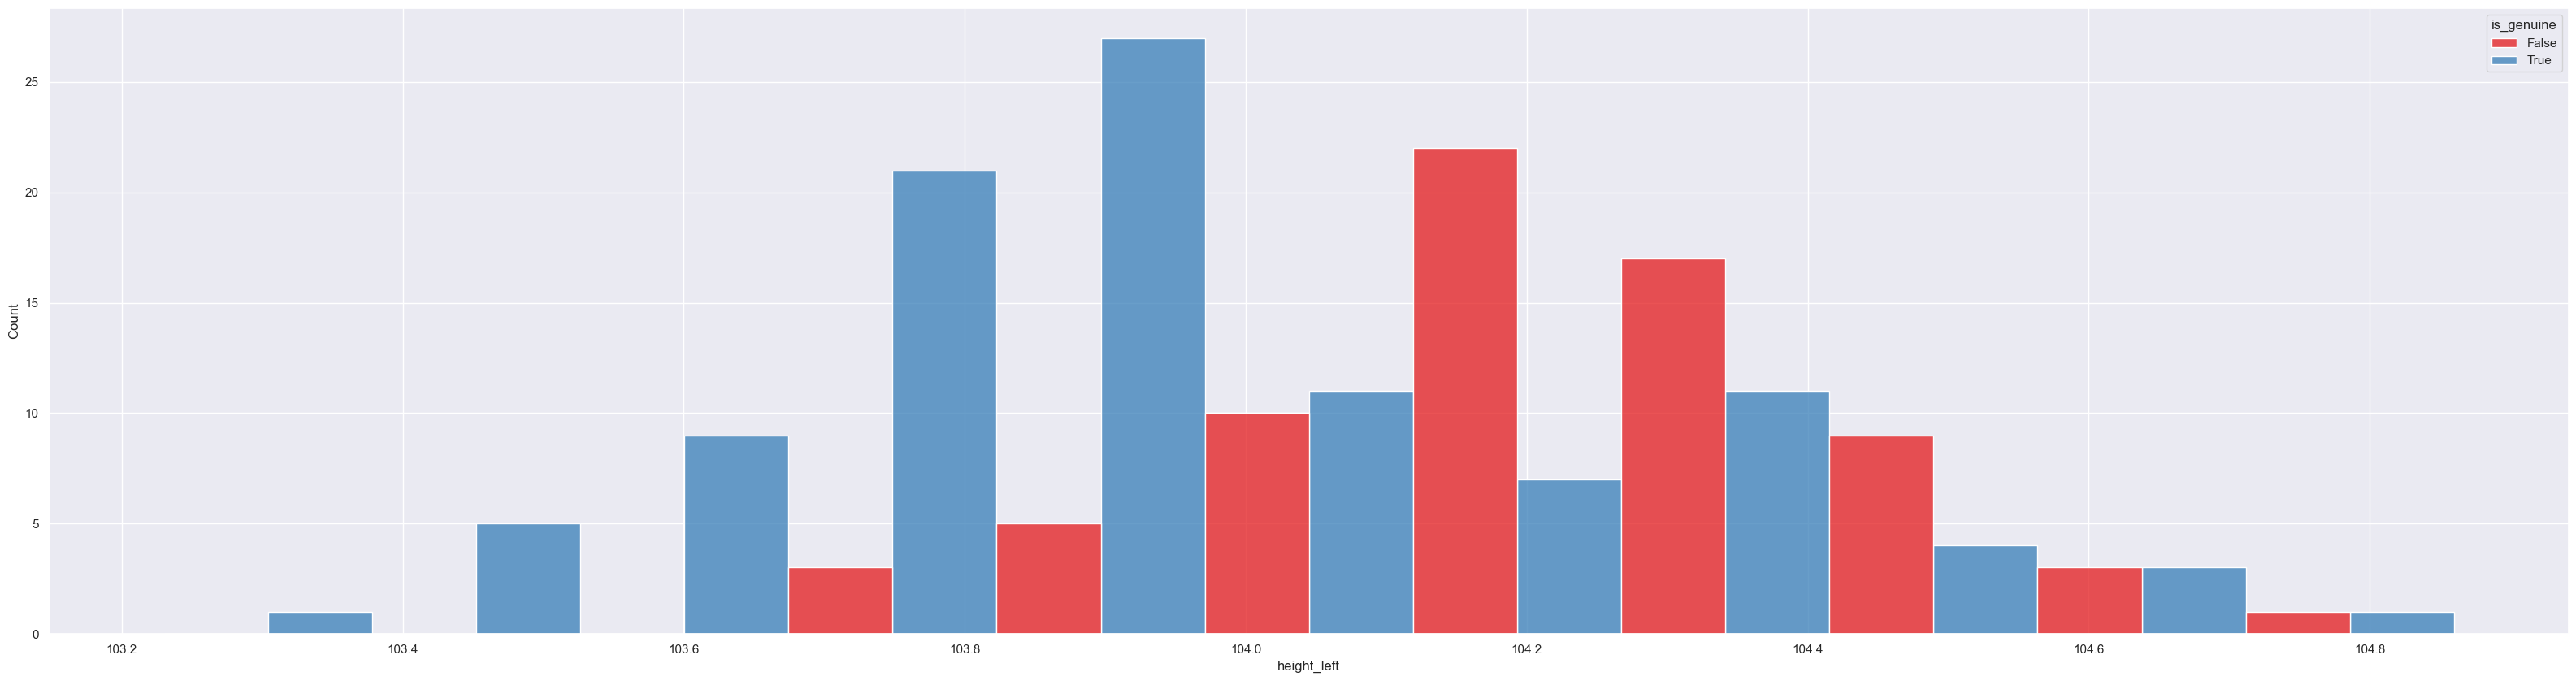

In [153]:
sns.histplot(data=data, x="height_left", hue="is_genuine", multiple ="dodge",palette = "Set1")

In [50]:
data_acp= data.drop("is_genuine", axis = 1)
data_acp

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...
165,172.11,104.23,104.45,5.24,3.58,111.78
166,173.01,104.59,104.31,5.04,3.05,110.91
167,172.47,104.27,104.10,4.88,3.33,110.68
168,171.82,103.97,103.88,4.73,3.55,111.87


<AxesSubplot:>

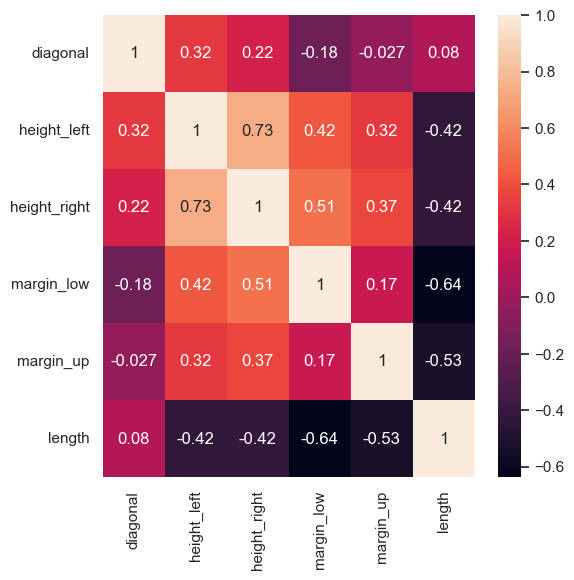

In [154]:
plt.figure(figsize=(6,6))
sns.heatmap(data_acp.corr(),annot=True)

Anova entre diagonal et is_genuine

In [161]:
#Model de reg pour obtenir les résidu 
mdl1 = statsmodels.formula.api.ols('diagonal ~ is_genuine', data = data)
res1 = mdl1.fit()

In [175]:
stats.shapiro(res1.resid)
#h0: les données suivent une loi normal h1: ne suis pas valide
#h0 si p-value > 0.05

ShapiroResult(statistic=0.9890121817588806, pvalue=0.21004751324653625)

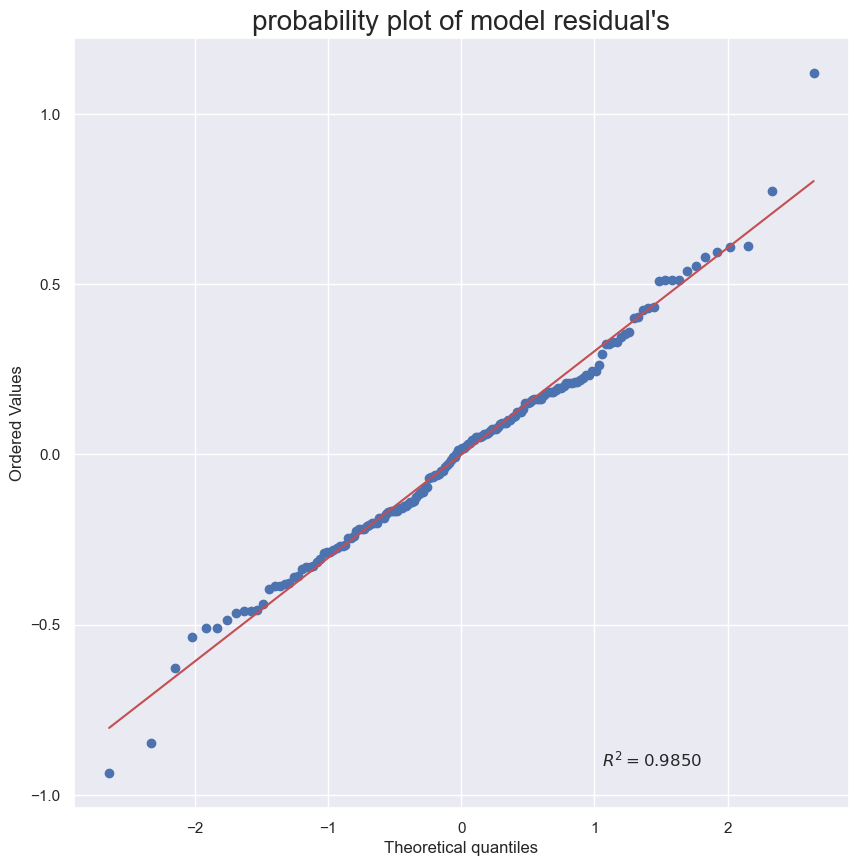

In [198]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

normality_plot,stat= stats.probplot(res1.resid,plot=plt,rvalue=True)
ax.set_title("probability plot of model residual's", fontsize=20)
ax.set

plt.show()

In [189]:
stats.levene(data["diagonal"][data["is_genuine"]== True],
             data["diagonal"][data["is_genuine"]== False])
#h0: les variances sont = h1: non
#valide h0 si p.value> 0.05

LeveneResult(statistic=0.2419219991560136, pvalue=0.6234634322702575)

#### on peut faire une anova

In [162]:
table1 = statsmodels.api.stats.anova_lm(res1)
table1

,df,sum_sq,mean_sq,F,PR(>F)
is_genuine,1.0,0.306264,0.306264,3.320728,0.07019
Residual,168.0,15.494278,0.092228,NaN,NaN


#### p.value> 0.05 variable inde dependante

In [163]:
#Model de reg pour obtenir les résidu 
mdl2 = statsmodels.formula.api.ols('height_left ~ is_genuine', data = data)
res2 = mdl2.fit()

In [176]:
stats.shapiro(res2.resid)

ShapiroResult(statistic=0.9841809272766113, pvalue=0.05072948709130287)

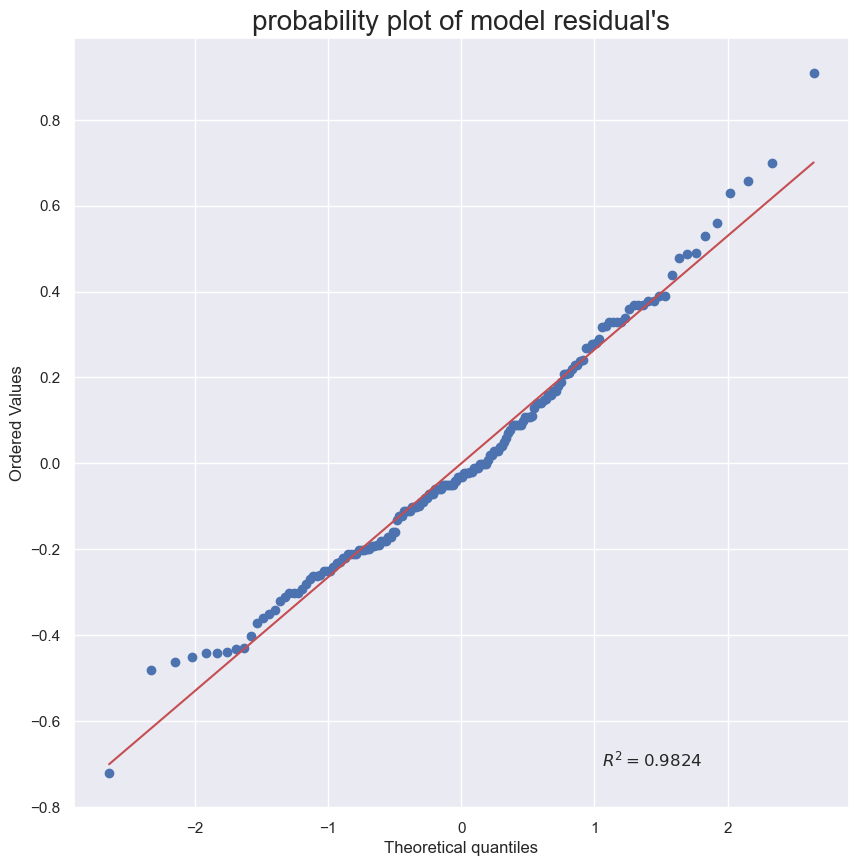

In [200]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

normality_plot,stat= stats.probplot(res2.resid,plot=plt,rvalue=True)
ax.set_title("probability plot of model residual's", fontsize=20)
ax.set

plt.show()

In [190]:
stats.levene(data["height_left"][data["is_genuine"]== True],
             data["height_left"][data["is_genuine"]== False])

LeveneResult(statistic=4.656787662802346, pvalue=0.03235106500140254)

on ne peux pas faire l'anova 

In [165]:
#Model de reg pour obtenir les résidu 
mdl3 = statsmodels.formula.api.ols('height_right ~ is_genuine', data = data)
res3 = mdl3.fit()

In [177]:
stats.shapiro(res3.resid)

ShapiroResult(statistic=0.9819138050079346, pvalue=0.02598201483488083)

ne suit pas une loi normal

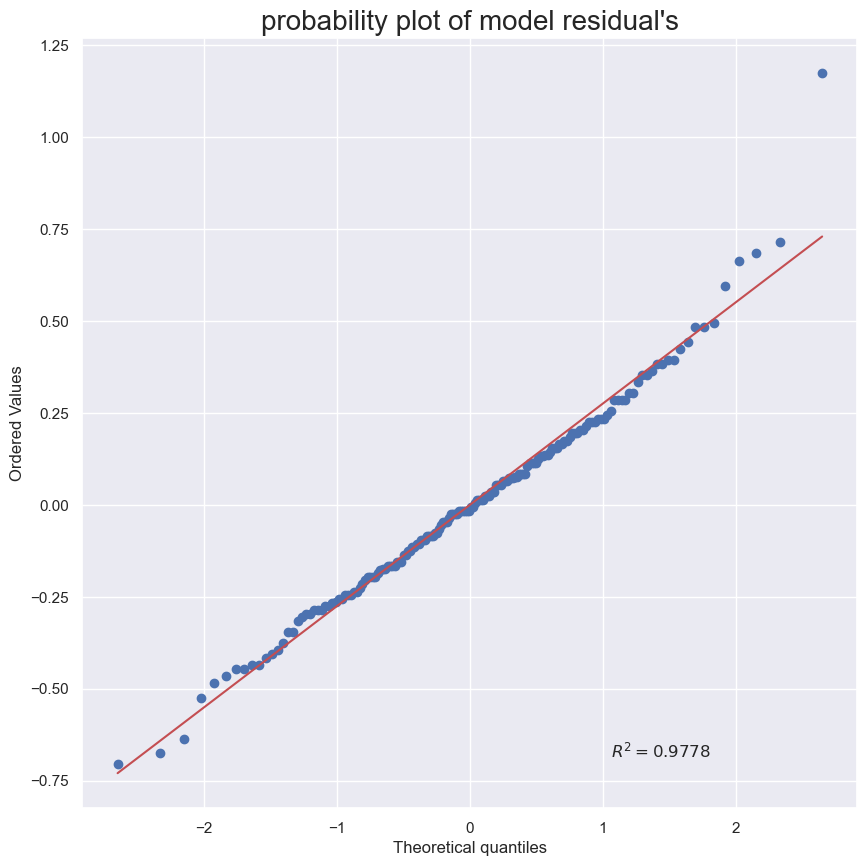

In [201]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

normality_plot,stat= stats.probplot(res3.resid,plot=plt,rvalue=True)
ax.set_title("probability plot of model residual's", fontsize=20)
ax.set

plt.show()

In [191]:
stats.levene(data["height_right"][data["is_genuine"]== True],
             data["height_right"][data["is_genuine"]== False])

LeveneResult(statistic=1.891563309644879, pvalue=0.17085685086245794)

In [167]:
#Model de reg pour obtenir les résidu 
mdl4 = statsmodels.formula.api.ols('margin_low ~ is_genuine', data = data)
res4 = mdl4.fit()

In [178]:
stats.shapiro(res4.resid)

ShapiroResult(statistic=0.9836654663085938, pvalue=0.0435420460999012)

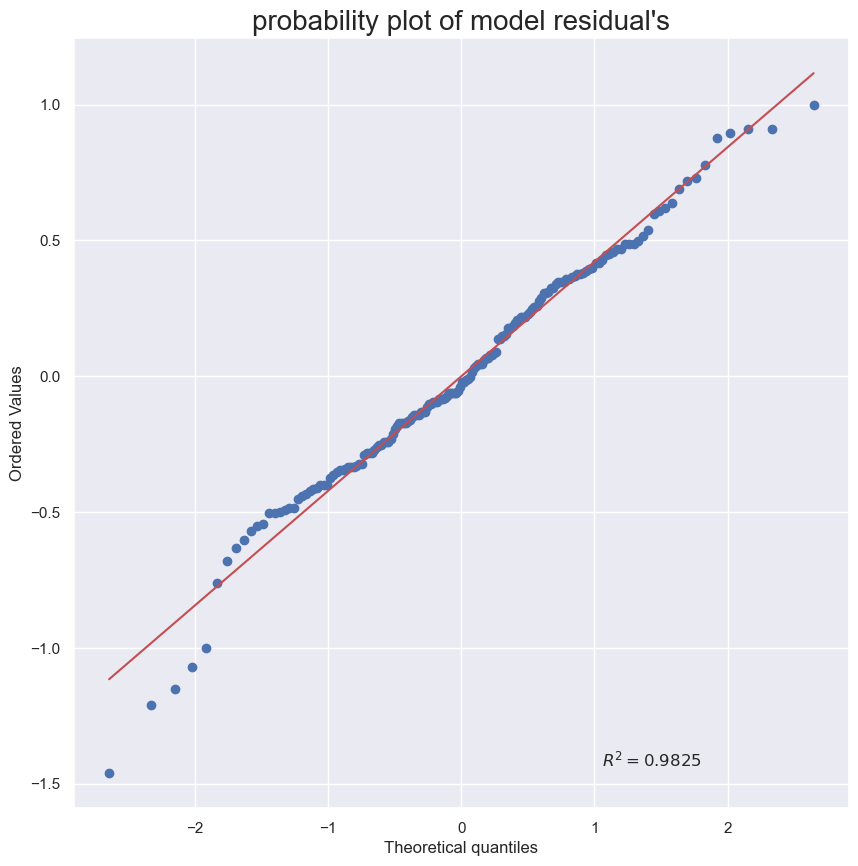

In [203]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

normality_plot,stat= stats.probplot(res4.resid,plot=plt,rvalue=True)
ax.set_title("probability plot of model residual's", fontsize=20)
ax.set

plt.show()

In [202]:
stats.levene(data["margin_low"][data["is_genuine"]== True],
             data["margin_low"][data["is_genuine"]== False])

LeveneResult(statistic=20.17599271649003, pvalue=1.3089591272653136e-05)

On ne peut pas faire l'anova

In [169]:
#Model de reg pour obtenir les résidu 
mdl5 = statsmodels.formula.api.ols('margin_up ~ is_genuine', data = data)
res5 = mdl5.fit()

In [179]:
stats.shapiro(res5.resid)

ShapiroResult(statistic=0.9861070513725281, pvalue=0.08986960351467133)

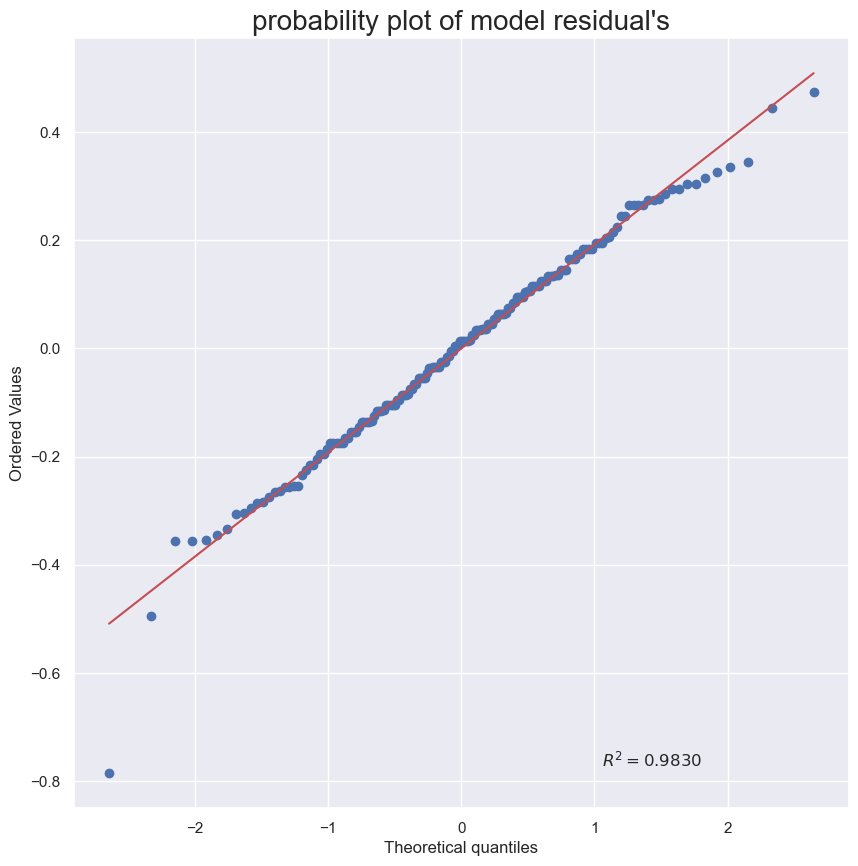

In [204]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

normality_plot,stat= stats.probplot(res5.resid,plot=plt,rvalue=True)
ax.set_title("probability plot of model residual's", fontsize=20)
ax.set

plt.show()

In [192]:
stats.levene(data["margin_up"][data["is_genuine"]== True],
             data["margin_up"][data["is_genuine"]== False])

LeveneResult(statistic=0.000516090234831502, pvalue=0.9819024811475876)

In [170]:
table5 = statsmodels.api.stats.anova_lm(res5)
table5

,df,sum_sq,mean_sq,F,PR(>F)
is_genuine,1.0,3.206859,3.206859,86.413125,7.567386e-17
Residual,168.0,6.234612,0.037111,NaN,NaN


#### Anova ok pour margin up et si le billet est vrai ou pas

In [171]:
#Model de reg pour obtenir les résidu 
mdl6 = statsmodels.formula.api.ols('length ~ is_genuine', data = data)
res6 = mdl6.fit()

In [180]:
stats.shapiro(res6.resid)

ShapiroResult(statistic=0.9745199680328369, pvalue=0.0032099944073706865)

Ne suit pas une loi normal 

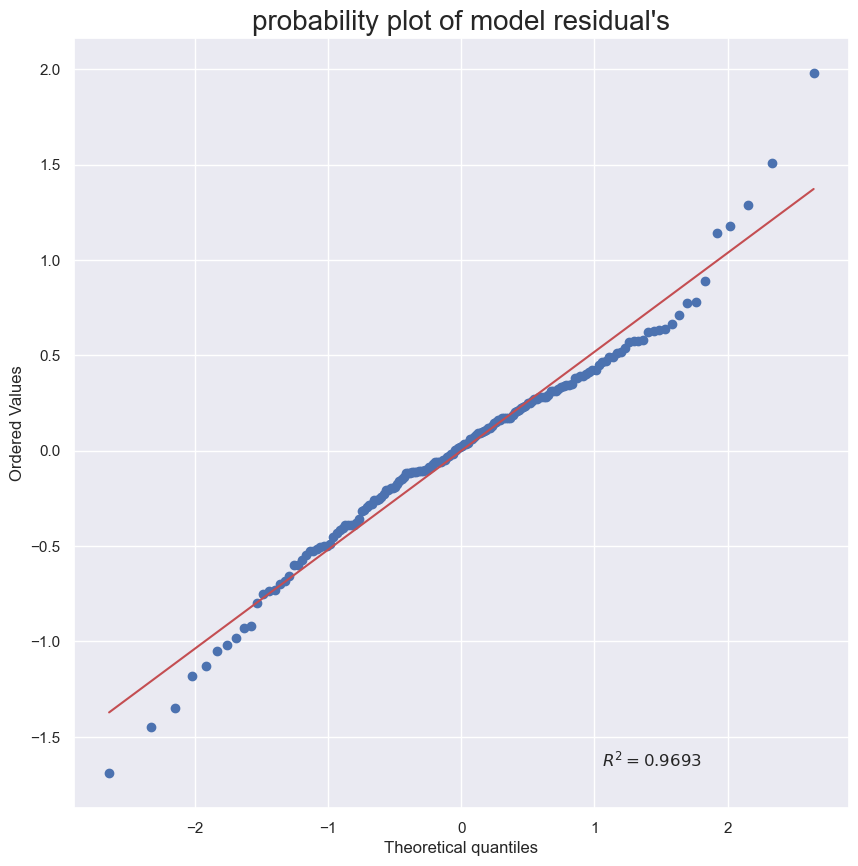

In [205]:
fig = plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

normality_plot,stat= stats.probplot(res6.resid,plot=plt,rvalue=True)
ax.set_title("probability plot of model residual's", fontsize=20)
ax.set

plt.show()

In [193]:
stats.levene(data["length"][data["is_genuine"]== True],
             data["length"][data["is_genuine"]== False])

LeveneResult(statistic=15.737985146769942, pvalue=0.00010754053217071483)

On ne peut pas faire l'anova

## Partie 2 : ANALYSE EN COMPOSANTES PRINCIPALES

In [52]:
from sklearn.preprocessing import scale
pca = PCA(n_components = 6)
pca.fit(scale(data_acp))

PCA(n_components=6)

In [53]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[2.86372065 1.32522178 0.85912514 0.51460481 0.27840703 0.19442354]
[0.47447921 0.21957106 0.14234524 0.08526295 0.04612822 0.03221331]


In [60]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(6)], 
        "Valeur propre" : pca.explained_variance_,
        "% variance expliquée" : np.round(pca.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,2.863721,47.0,47.0
1,Dim2,1.325222,22.0,69.0
2,Dim3,0.859125,14.0,84.0
3,Dim4,0.514605,9.0,92.0
4,Dim5,0.278407,5.0,97.0
5,Dim6,0.194424,3.0,100.0


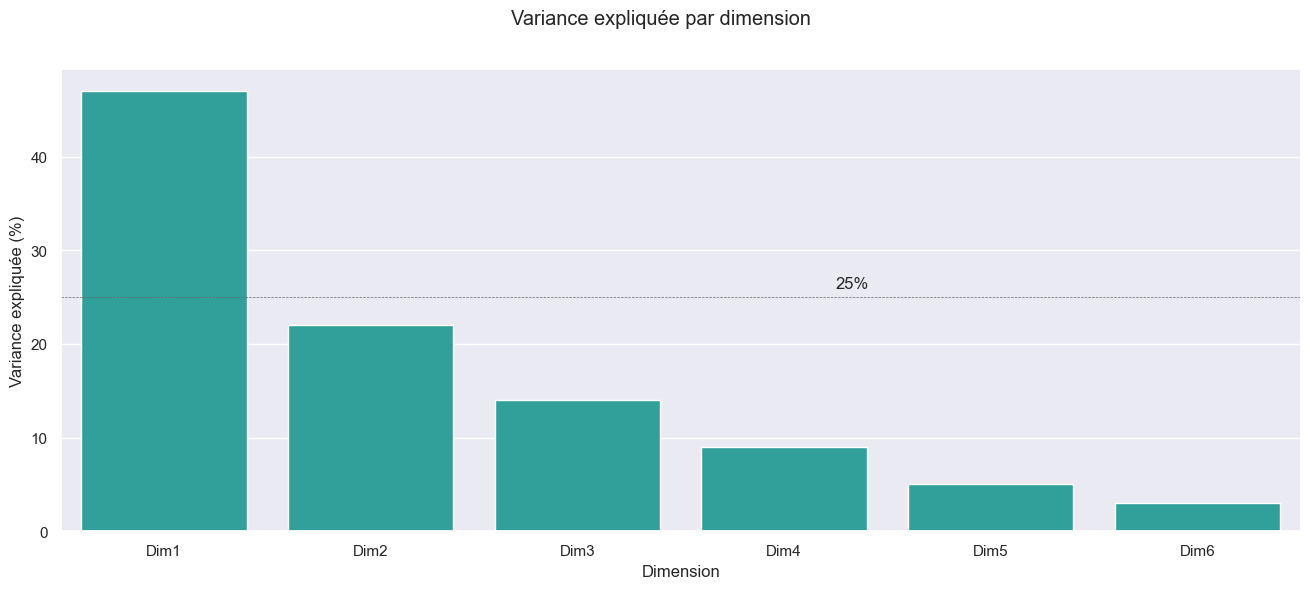

In [63]:
plt.figure(figsize=(16, 6))
g_eig = sns.barplot(x = "Dimension", 
                        y = "% variance expliquée",
                        palette = ["lightseagreen"],
                        data = eig)
plt.text(3.25, 26, "25%")
plt.axhline(y = 25, linewidth = .5, color = "dimgray", linestyle = "--") # 25 = 100 / 4 (nb dimensions)
g_eig.set(ylabel = "Variance expliquée (%)")
g_eig.figure.suptitle("Variance expliquée par dimension")

plt.show()

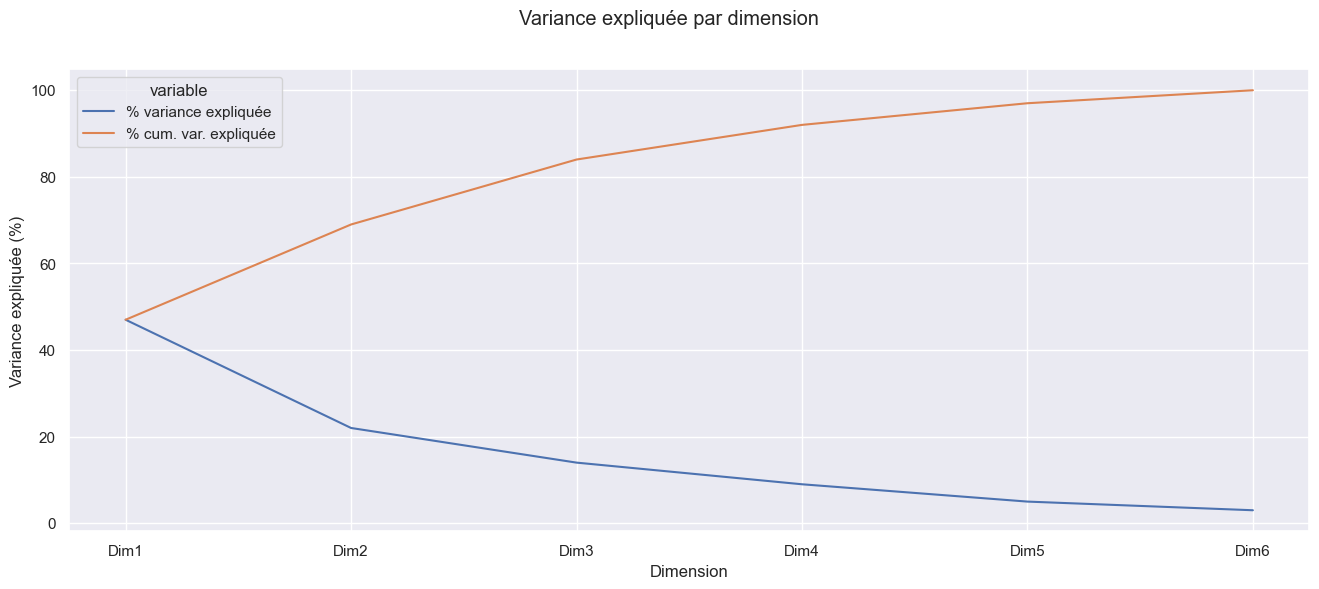

In [65]:
plt.figure(figsize=(16, 6))

eig2 = eig.filter(["Dimension", "% variance expliquée", "% cum. var. expliquée"]).melt(id_vars = "Dimension")
g_eig2 = sns.lineplot(x = "Dimension", 
                 y = "value",
                 hue = "variable",
                 data = eig2)

g_eig2.set(ylabel = "Variance expliquée (%)")
g_eig2.figure.suptitle("Variance expliquée par dimension")

plt.show()

In [96]:
billets_pca = pca.transform(data_acp[data_acp.columns[:6]])
billets_pca_df = pd.DataFrame({
    "Dim1" : billets_pca[:,0], 
    "Dim2" : billets_pca[:,1], 
    "Dim3" : billets_pca[:,2], 
    "types" : data.is_genuine
})
billets_pca_df.head()

C:\Users\lilou\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning:

X has feature names, but PCA was fitted without feature names



,Dim1,Dim2,Dim3,types
0,64.526237,227.876239,28.008617,True
1,62.927694,227.403685,27.504555,True
2,62.894108,227.595919,27.763602,True
3,62.740869,227.668243,27.184494,True
4,63.072546,227.534453,28.527434,True


In [69]:
coordvar = pca.components_.T * np.sqrt(pca.explained_variance_)
coordvar_df = pd.DataFrame(coordvar, columns=['PC'+str(i) for i in range(1, 7)], index= data_acp.columns[:6])
coordvar_df

,PC1,PC2,PC3,PC4,PC5,PC6
diagonal,0.124000,0.897507,-0.082395,-0.401529,-0.118769,0.053867
height_left,0.804670,0.390539,0.113785,0.199459,0.377750,0.102355
height_right,0.832286,0.271153,0.142584,0.329224,-0.256958,-0.212007
margin_low,0.729406,-0.368997,0.475316,-0.162502,-0.164576,0.241469
margin_up,0.596587,-0.162455,-0.761115,0.097087,-0.102332,0.156258
length,-0.787529,0.362089,0.117635,0.411551,-0.134241,0.231028


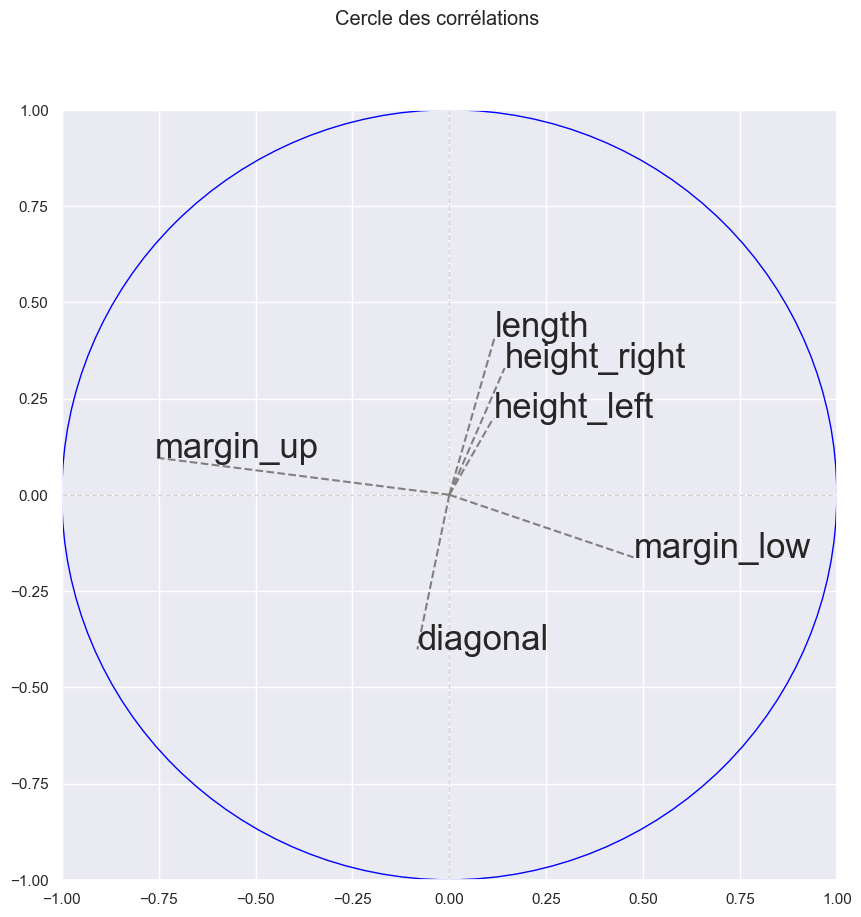

In [219]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(6):
    axes.text(coordvar_df["PC3"][j],coordvar_df["PC4"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["PC3"][j]], [0,coordvar_df["PC4"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

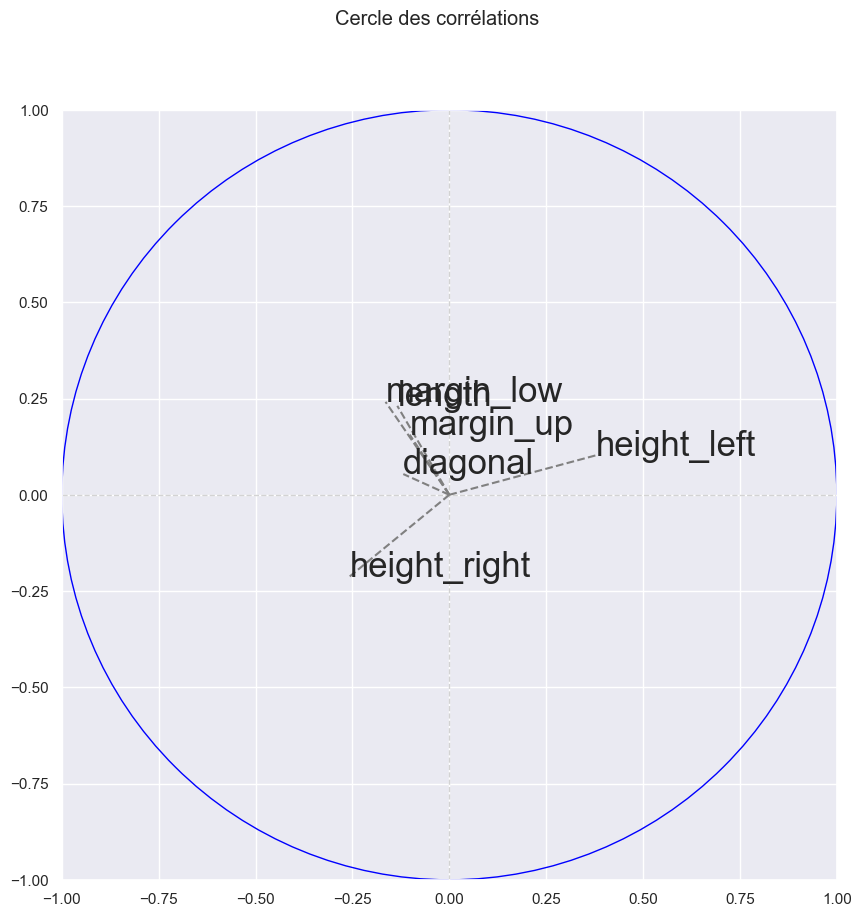

In [220]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(6):
    axes.text(coordvar_df["PC5"][j],coordvar_df["PC6"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["PC5"][j]], [0,coordvar_df["PC6"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

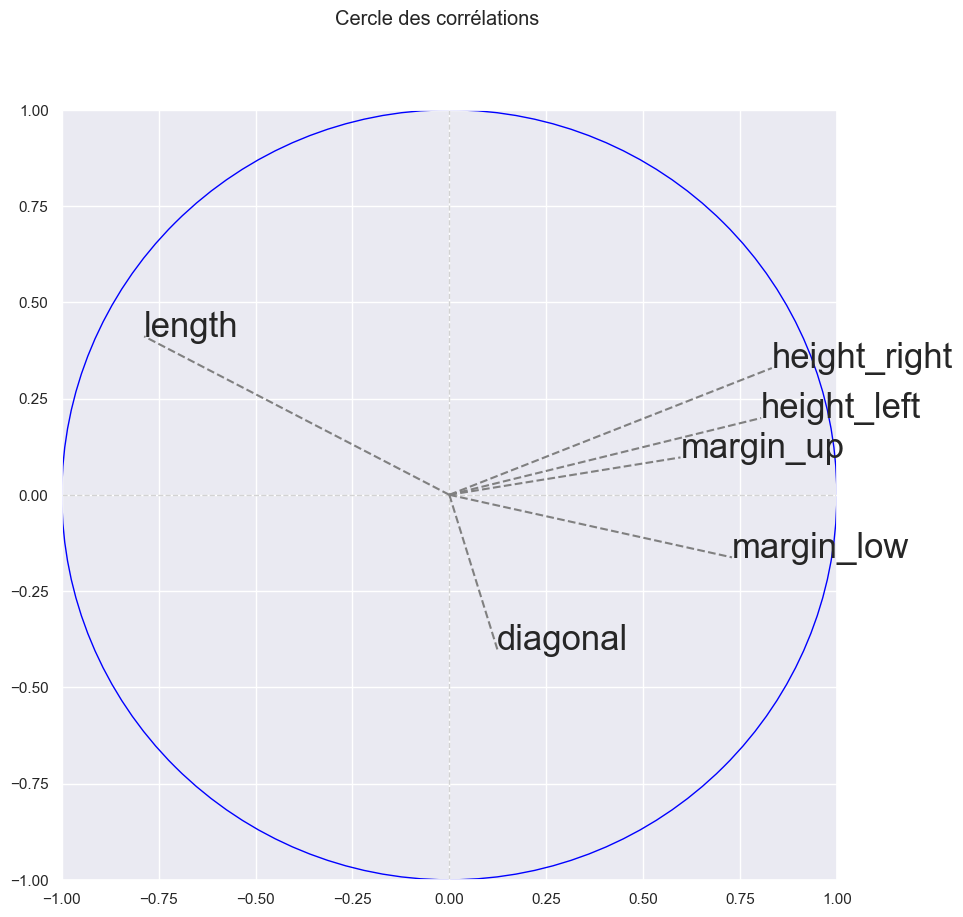

In [78]:
fig, axes = plt.subplots(figsize = (10, 10))
fig.suptitle("Cercle des corrélations")
axes.set_xlim(-1, 1)
axes.set_ylim(-1, 1)
axes.axvline(x = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
axes.axhline(y = 0, color = 'lightgray', linestyle = '--', linewidth = 1)
for j in range(6):
    axes.text(coordvar_df["PC1"][j],coordvar_df["PC4"][j], coordvar_df.index[j], size = 25)
    axes.plot([0,coordvar_df["PC1"][j]], [0,coordvar_df["PC4"][j]], color = "gray", linestyle = 'dashed')
plt.gca().add_artist(plt.Circle((0,0),1,color='blue',fill=False))

plt.show()

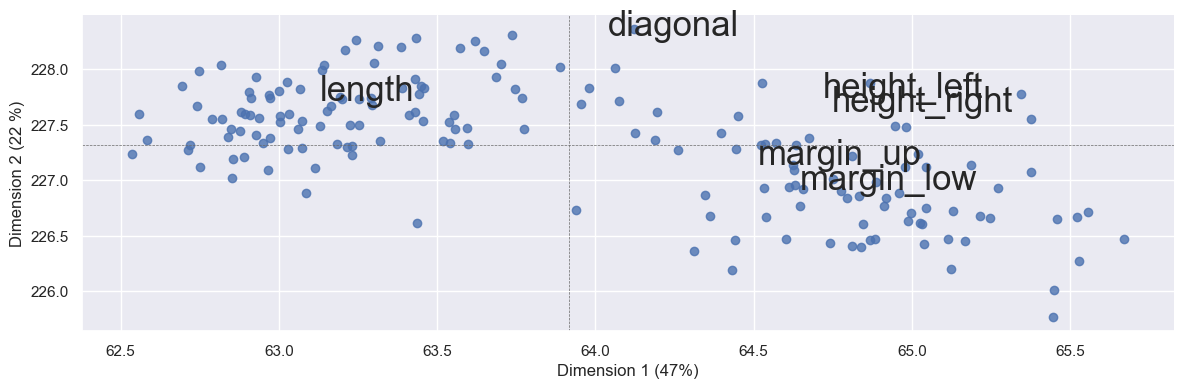

In [221]:
g_pca = sns.lmplot(x = "Dim1", y = "Dim2", data = billets_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (47%)", ylabel = "Dimension 2 (22 %)")
#g_pca.fig.suptitle("Premier plan factoriel")
axes = g_pca.axes[0,0]
for j in range(6):
    axes.text(coordvar_df["PC1"][j] * 1 + billets_pca_df.Dim1.mean(),
              coordvar_df["PC2"][j] * 1.1 + billets_pca_df.Dim2.mean(), 
              coordvar_df.index[j], size = 25)
plt.axvline(x = billets_pca_df.Dim1.mean(), linewidth = .5, color = "dimgray", linestyle = "--")
plt.axhline(y = billets_pca_df.Dim2.mean(), linewidth = .5, color = "dimgray", linestyle = "--")

plt.show()

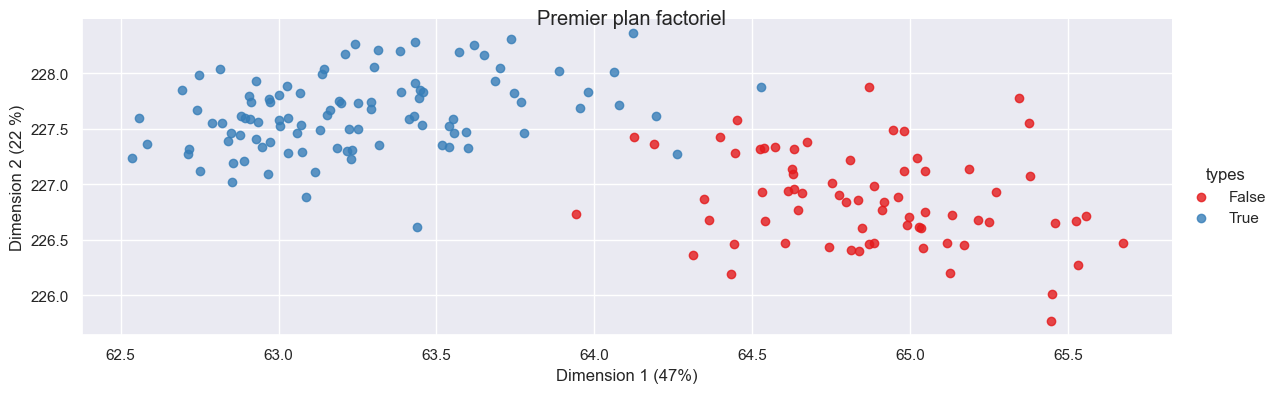

In [115]:
g_pca = sns.lmplot(x = "Dim1", y = "Dim2", hue = "types",palette= "Set1", data = billets_pca_df, fit_reg = False, 
                       height = 4, aspect = 3)
g_pca.set(xlabel = "Dimension 1 (47%)", ylabel = "Dimension 2 (22 %)")
g_pca.fig.suptitle("Premier plan factoriel")

plt.show()

In [88]:
import plotly.express as px
fig = px.scatter_3d(billets_pca_df, x='Dim1', y='Dim2', z='Dim3',color="types" )
fig.show()

Repartez de l'exploration via l'étude VISA pour cette partie + le cours sur OC
Dans tous les cas, je veux voir ce que j'ai cité plus haut.

## Partie 3 : PREDICTION

In [208]:
X = billets_pca_df[['Dim1','Dim2', 'Dim3']]
y = billets_pca_df['types']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1)

# Choose your model
model = LogisticRegression()

# Fit the model with the train set
model.fit(X_train, y_train)

# Evaluate the model with the test set
model.score(X_test, y_test)

0.9607843137254902

In [217]:
from sklearn.metrics import classification_report
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['True','False']))

              precision    recall  f1-score   support

        True       0.93      0.93      0.93        15
       False       0.97      0.97      0.97        36

    accuracy                           0.96        51
   macro avg       0.95      0.95      0.95        51
weighted avg       0.96      0.96      0.96        51



Effectuer la prédiction de nouveaux billets via un algorithme que vous allez mettre en place (kmeans? regression logistique? A vous de voir).  

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=2,random_state=2)
kmeans.fit(X_train,y_train)

In [ ]:
y_pred=kmeans.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['True','False']))